/var/folders/qz/nf75cr_j2szgdjxl_hbblnx00000gn/T/ipykernel_727/1626901008.py:9: DtypeWarning: Columns (0,4,5,6,10,11,12,13,14,15,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


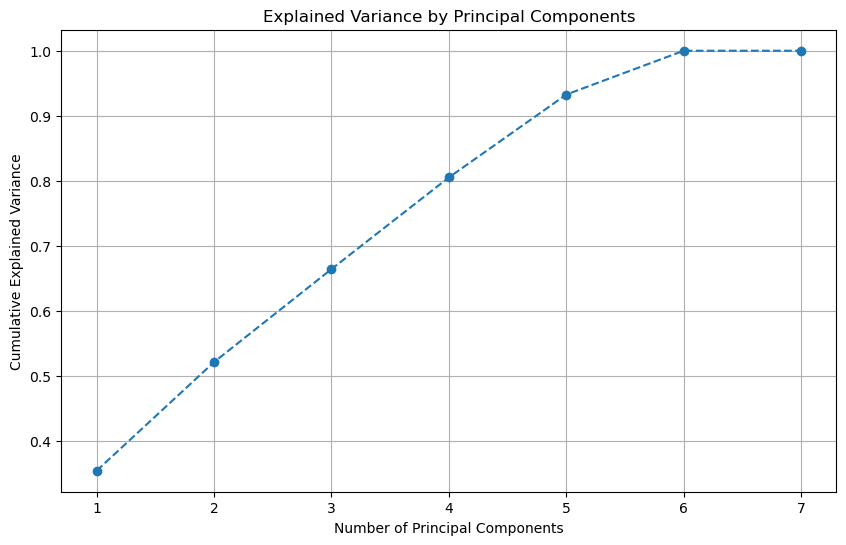

Number of components to explain 95% variance: 6
        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.063601  0.008454  0.215770 -0.041609 -0.021879  0.044677
1  0.051033  0.046731  0.212723  0.032430  0.183277 -0.085714
2  0.688622  0.023172  0.338587  0.986140  0.589894 -0.488240
3  0.688669  0.023214  0.340386  0.985799  0.589985 -0.488306
4  0.667260 -0.355102  0.173682 -0.226401 -0.117134  0.002539

PCA Loadings:
                        PC1       PC2       PC3       PC4       PC5       PC6
LAND SQUARE FEET   0.215278  0.661661 -0.023545 -0.071747 -0.550136 -0.455531
GROSS SQUARE FEET  0.456588  0.314379  0.062908  0.248966 -0.125611  0.781648
YEAR BUILT         0.025269  0.022926  0.980123 -0.185678  0.049365 -0.035789
SALE PRICE         0.261809  0.117190  0.096409  0.751225  0.451440 -0.374554
RESIDENTIAL UNITS  0.556957 -0.403369 -0.026155 -0.120498 -0.131372 -0.143693
COMMERCIAL UNITS   0.172368  0.447916 -0.146490 -0.515689  0.676448  0.003920
TOTAL UNITS        

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = "nyc-property-sales.csv"
data = pd.read_csv(file_path)

# Data cleaning and preprocessing
numeric_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE', 
                   'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS']

# Convert columns to numeric
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing SALE PRICE
data = data.dropna(subset=['SALE PRICE'])

# Impute missing values with median
for col in numeric_columns:
    data[col] = data[col].fillna(data[col].median())

# Standardize numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_columns])

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Visualize explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Choose the number of components (e.g., enough to explain 95% of the variance)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components}")

# Apply PCA with the chosen number of components
pca_final = PCA(n_components=n_components)
reduced_data = pca_final.fit_transform(scaled_data)

# Create a DataFrame for the reduced data
columns = [f"PC{i+1}" for i in range(n_components)]
reduced_data_df = pd.DataFrame(reduced_data, columns=columns)

print(reduced_data_df.head())

# PCA Loadings
loadings = pd.DataFrame(
    pca_final.components_.T,
    columns=columns,
    index=numeric_columns
)

print("\nPCA Loadings:")
print(loadings)


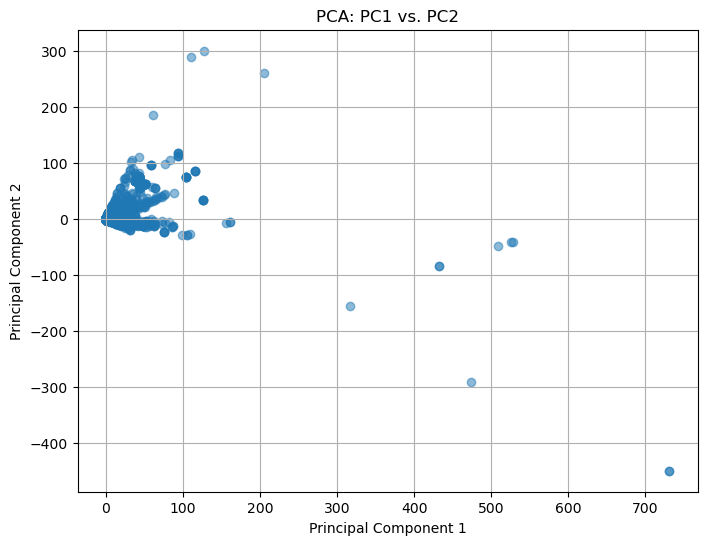

In [2]:
# Scatterplot of PC1 vs. PC2
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_df['PC1'], reduced_data_df['PC2'], alpha=0.5)
plt.title('PCA: PC1 vs. PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


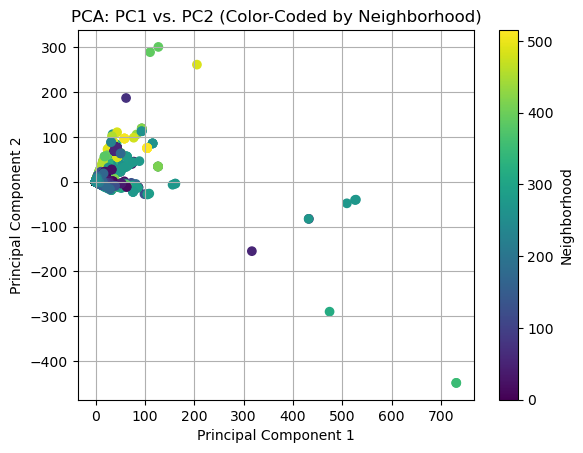

In [3]:
# Color-code by neighborhood (or another feature)
plt.scatter(reduced_data_df['PC1'], reduced_data_df['PC2'], c=data['NEIGHBORHOOD'].factorize()[0], cmap='viridis')
plt.colorbar(label='Neighborhood')
plt.title('PCA: PC1 vs. PC2 (Color-Coded by Neighborhood)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


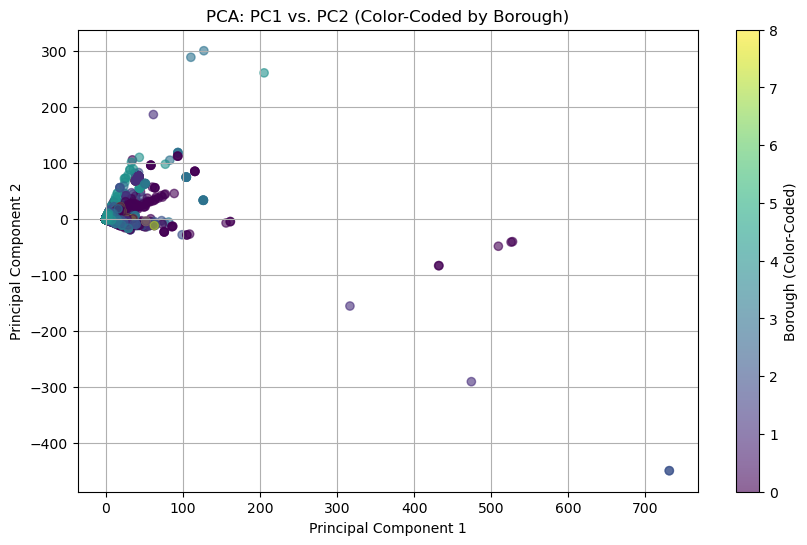

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Assuming 'data' contains the original dataset and 'reduced_data_df' contains PC1 and PC2
# Map BOROUGH to a numeric value for color-coding
borough_mapping = {borough: idx for idx, borough in enumerate(data['BOROUGH'].unique())}
borough_colors = data['BOROUGH'].map(borough_mapping)

# Scatterplot of PC1 vs. PC2 color-coded by BOROUGH
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_data_df['PC1'], reduced_data_df['PC2'], 
                       c=borough_colors, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Borough (Color-Coded)')
plt.title('PCA: PC1 vs. PC2 (Color-Coded by Borough)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
